

# Boston House Prices Regression Task

## Project Overview

This project focuses on the analysis and predictive modeling of the Boston Housing dataset, which contains data collected by the U.S. Census Service regarding housing in Boston, Massachusetts. The primary goal is to predict the median value of owner-occupied homes using various predictive modeling techniques. 

This project also aims to compare the predictive performance of traditional machine learning models and a neural network model, and to also identify and understand the best predictors of housing values.

The analysis will involve several key phases, including exploratory data analysis (EDA), data preprocessing, modeling, and evaluation. 

## Goals
1. **Exploratory Data Analysis (EDA)**: To perform a thorough analysis of the dataset to understand the distribution of data, identify patterns, and detect anomalies.

2. **Outlier Detection and Removal**: To improve model performance by identifying and removing outliers from the dataset, based on the Interquartile Range (IQR) method.

3. **Data Normalization/Scaling**: To transform the data so that it fits within a specific scale. This step is important because many machine learning algorithms, especially neural networks, perform better if the features are on the same scale. 

4. **Model Implementation and Comparison**: To establish baseline performance with the traditional regression model, implement and optimize more complex models like decision trees and random forests, and develop a Sequential neural network model, comparing their effectiveness using Mean Absolute Error (MAE) and Mean Squared Error (MSE).

5. **Evaluation and Analysis**: To evaluate the models based on their predictive accuracy and computational efficiency and to analyze the models' performance to understand the advantages and limitations of each approach in the context of housing price prediction.

## Data Loading and Overview

### Import Necessary Libraries and Load Data

In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dataset = pd.read_csv('housing.csv', header = None, delimiter = r"\s+", names = column_names)

### Initial Data Exploration

In [3]:
# View first 3 rows of the dataset 
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [4]:
# View dataset shape
print(dataset.shape)

(506, 14)


### Dataset Description

The following describes the dataset columns:

1. **CRIM**: Per capita crime rate by town. This represents the level of crime in each town, calculated on a per capita basis.

2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft. This feature represents the percentage of land in the town zoned for large residential properties.

3. **INDUS**: Proportion of non-retail business acres per town. It indicates the percentage of the town's land used for non-retail business purposes.

4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise). This is a binary variable indicating whether the tract is adjacent to the Charles River.

5. **NOX**: Nitric oxides concentration (parts per 10 million). This measures the level of nitric oxides in the air, which is a by-product of industrial processes and combustion vehicles.

6. **RM**: Average number of rooms per dwelling. This indicates the average number of rooms in residential buildings in the town.

7. **AGE**: Proportion of owner-occupied units built prior to 1940. It represents the percentage of units that are owner-occupied and were constructed before 1940.

8. **DIS**: Weighted distances to five Boston employment centres. This metric calculates the distance from residential areas to major employment centers in Boston, weighted by some undisclosed factors.

9. **RAD**: Index of accessibility to radial highways. This index measures the accessibility of radial highways from the town, which can influence commuting times and property values.

10. **TAX**: Full-value property-tax rate per $10,000. This is the rate of property tax applied to the full value of residential properties.

11. **PTRATIO**: Pupil-teacher ratio by town. This indicates the average number of pupils per teacher in schools in the town, reflecting on the educational resources available.

12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents. This formula calculates a value based on the proportion of black residents in the town, where 0.63 is apparently an average or baseline proportion.

13. **LSTAT**: Percentage of lower status of the population. This represents the percentage of the lower socioeconomic status population in the town.

14. **MEDV**: Median value of owner-occupied homes in $1000s. This is the target variable and represents the median value of homes that are owner-occupied, expressed in thousands of dollars.

## Exploratory Data Analysis (EDA)

### Statistical Summary
Use .describe() to give a statistical summary of the data.

In [6]:
# View dataset description
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


It's particularly interesting to note features like 'RM', which represent the average number of rooms per dwelling, and 'LSTAT', which is the percentage of the lower status of the population, as they might be directly correlated with the 'MEDV', the median value of owner-occupied homes.

### Visualizations

Create visualizations to understand the distribution of variables, relationships between features, and target variable. 

#### Histograms and box plots for numerical features

In [5]:
# Plot Histograms and box plots for numerical features in the dataset

def plot_feature_distributions(df):
    # Get df columns
    numeric_cols = df.select_dtypes(include = ['number']).columns
    
    # Define the number of rows required for subplots
    nrows = len(numeric_cols)
    
    # Create subplots: one row per feature
    fig, axs = plt.subplots(nrows = nrows, ncols = 2, figsize = (12, 6 * nrows))
    
    for i, col in enumerate(numeric_cols):
        # Plot histogram
        sns.histplot(df[col], ax = axs[i, 0], kde = True, stat = "density", linewidth = 0)
        axs[i, 0].set_title(f'Histogram of {col}')
        
        # Plot Boxplot
        sns.boxplot(x = df[col], ax = axs[i, 1])
        axs[i, 1].set_title(f'Boxplot of {col}')
        
    plt.tight_layout()
    plt.show()

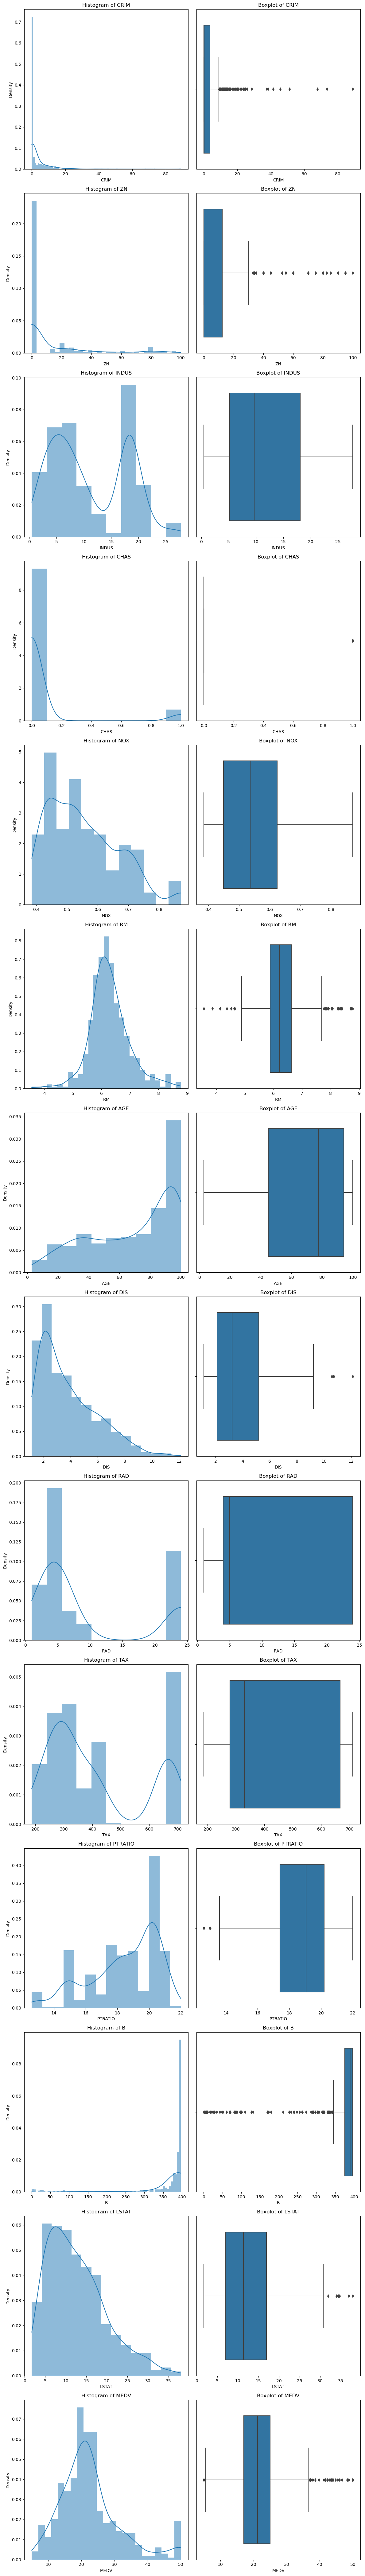

In [6]:
# Call the plot feature distribution function
plot_feature_distributions(dataset)

In the histograms and boxplots above, it's evident that some features have a long tail or points far from the rest of the data, indicating potential outliers. For instance, the crime rate per capita (CRIM) feature shows a right-skewed distribution, suggesting that most neighborhoods have low crime rates, but a few have very high rates.


#### Scatter plots for relationships between features and the target

In [7]:
# Function to plot scatter plots for each numeric feature in the dataset against a target feature
def plot_feature_relationships(df, target):
    # Filter numeric columns and remove the target column from the list
    numeric_cols = df.drop(columns = [target]).select_dtypes(include = ['number']).columns
    
    # Define the number of rows for the subplot grid
    nrows = len(numeric_cols)
    # Each row will have one plot
    ncols = 1 
    
    # Adjust figure size as needed 
    fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (8, 3 * nrows))
    
    # If there is only one feature
    if nrows == 1:
        axs = [axs]
        
    for i, feature in enumerate(numeric_cols):
        axs[i].scatter(df[feature], df[target])
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel(target)
        axs[i].set_title(f'{feature} vs. {target}')
    plt.tight_layout()
    plt.show()

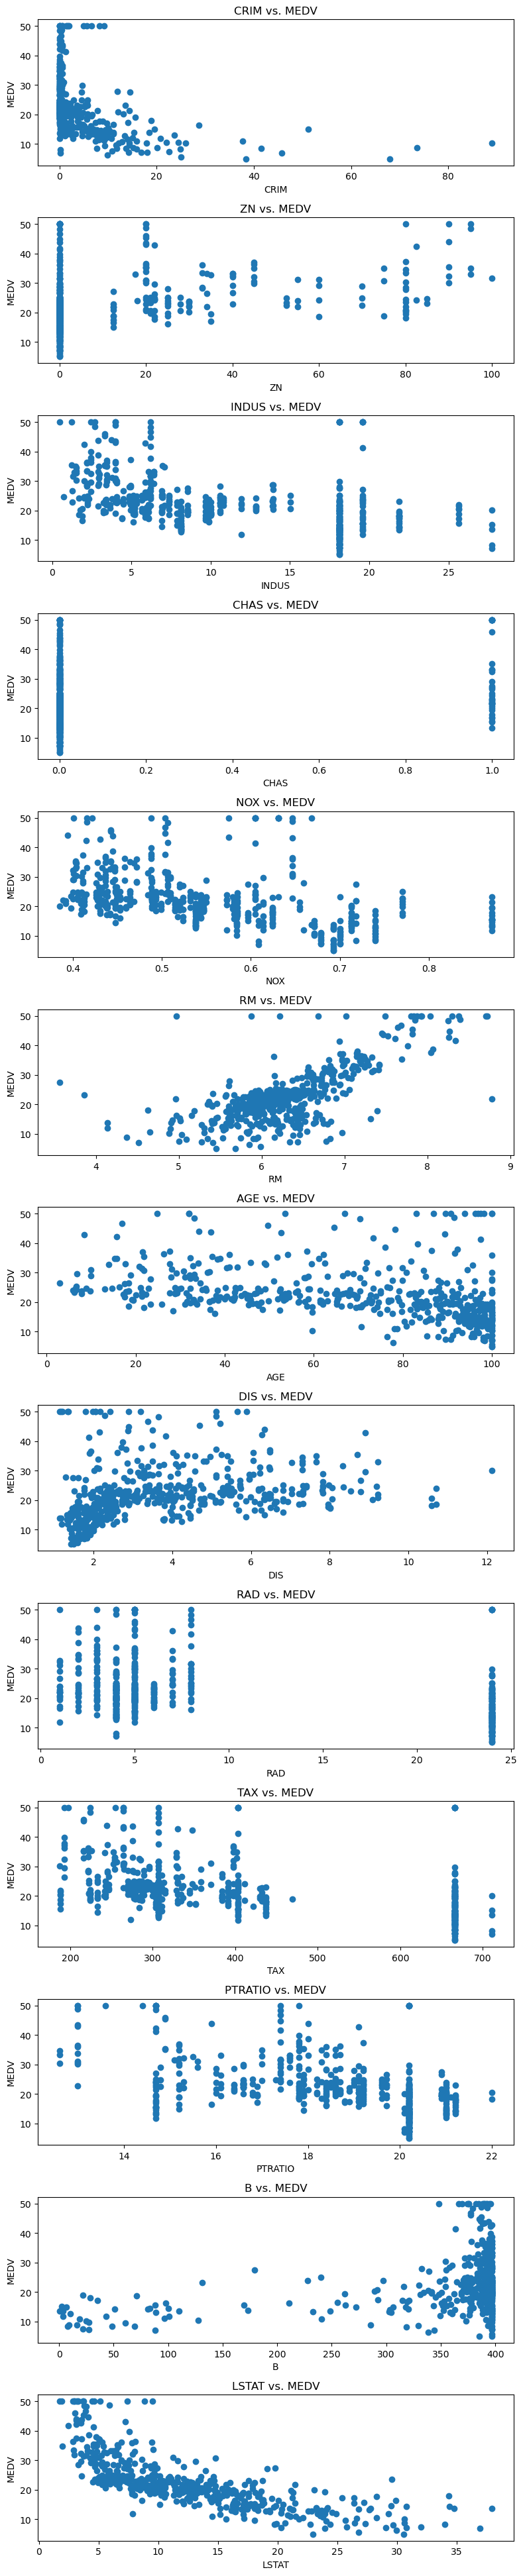

In [8]:
# Call function
plot_feature_relationships(dataset, 'MEDV')

While some features show a clear relationship with the median home values, others do not exhibit a straightforward pattern. This emphasizes the complexity of the housing market, where the impact of individual features on home values is influenced by a myriad of factors. 

#### Heatmap for correlation analysis

In [9]:
# Store the features and target in X and y respectively 
dataset_1 = dataset.copy()

y = dataset.pop('MEDV')
X = dataset.copy()

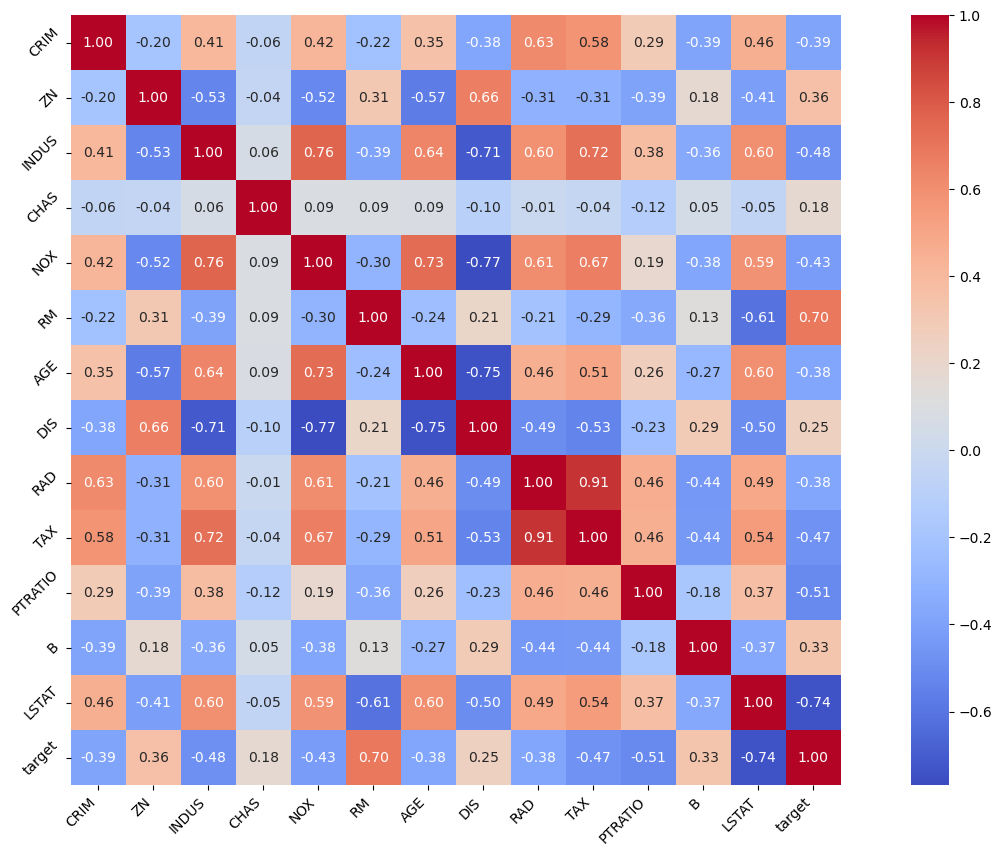

In [10]:
# Append y to X to include the target variable in the correlation matrix
X_with_target = X.copy()
X_with_target['target'] = y

# Calculate the correlation matrix
corr_matrix = X_with_target.corr()

# Plot the correlation matrix
plt.figure(figsize = (18, 10))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", cbar = True, square = True)

# Adjust layout to make rrom for the rotated x-axix labels
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 45)
plt.show()

Some pairs of features exhibit high correlation (either positive or negative). For instance, a strong positive correlation between TAX and RAD suggests that property tax rates and accessibility to highways are related, which makes intuitive sense as more accessible areas may be higher in demand and thus have higher taxes.

Also, focusing on the last row/column, which correlates variables with the median home value (MEDV), we can identify which features are most strongly associated with the target. For example, LSTAT (percentage of lower status of the population) shows a strong negative correlation with MEDV, indicating that as the proportion of lower status population increases, the median home value tends to decrease. This suggests that LSTAT could be a powerful predictor for MEDV in our modeling efforts. Similarly, the number of rooms (RM) shows a strong positive correlation with MEDV, supporting the idea that larger homes with more rooms generally sell for higher prices. These insights may be for our predictive model.

## Data Preprocessing

### Outlier Removal

Identify outliers using the Interquartile Range (IQR) method. The IQR is a measure of statistical dispersion and is calculated as the difference between the 25th (Q1) and 75th (Q3) percentiles. 

Outliers here are defined as those values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. These boundaries are commonly used in statistical analysis to flag outliers.

In [11]:
def cap_outliers(df, columns):
    # Iterate over the provided columns to apply the capping to each
    for column in columns:
        # Calculate the first quartile (25th percentile) for the column
        Q1 = df[column].quantile(0.25)
        # Calculate the third quartile (75th percentile) for the column
        Q3 = df[column].quantile(0.75)
        # Calculate the Interquartile Range (IQR) as the difference between Q3 and Q1
        IQR = Q3 - Q1
        
        # Determine the lower bound to cap outliers below
        lower_bound = Q1 - 1.5 * IQR
        # Determine the upper bound to cap outliers above
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the values beyond the lower and upper bounds
        df[column] = df[column].clip(lower = lower_bound, upper = upper_bound)
        
    # Return the dataframe with capped outliers
    return df

In [12]:
# Call the cap outliers function
dataset_without_outliers = cap_outliers(dataset_1, dataset_1.columns)

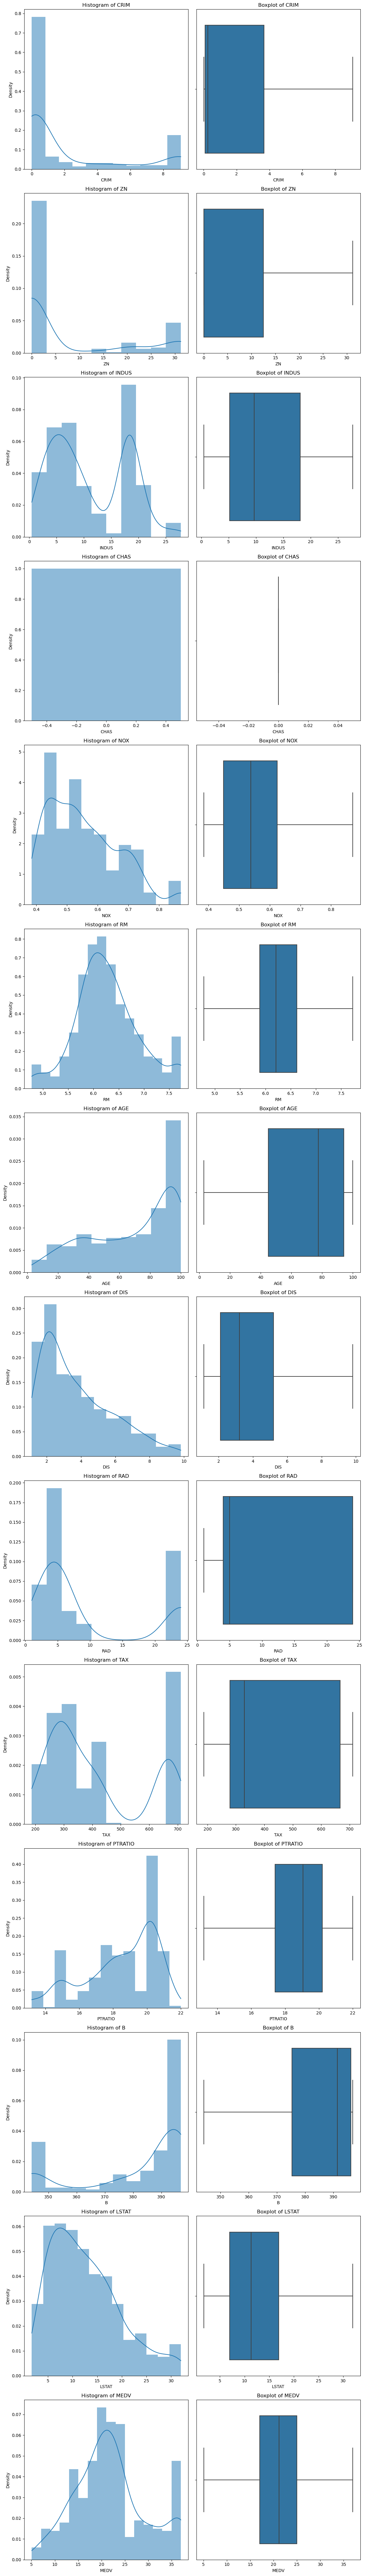

In [13]:
# Call plot feature distributions function to view feature distributions after capping outliers
plot_feature_distributions(dataset_without_outliers)

Before capping, the 'CRIM' feature had a significantly long right tail, indicating many outlier values. After capping, we observe a more uniform distribution within a defined range, as extreme values have been brought to the threshold, demonstrating a clear before-and-after effect of the outlier handling strategy.

### Scaling/Normalization
Standardize the dataset to improve the performance of the models.

In [90]:
def scale_data(dataset, target):
    
    # Split dataset into features and target
    X = dataset.drop(target, axis = 1)
    y = dataset[target]
    
    # Split dataset into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
    
    # Print shapes of the train and test feature and label sets
    print(f'Train feature shape: {X_train.shape} \nTrain labels shape: 
          {y_train.shape} \nTest features shape: {X_test.shape} \nTest labels shape: {y_test.shape} ')
    
    # Scale features 
    scaler_x = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler_x.fit_transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler_x.transform(X_test), columns = X_test.columns)
    
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [91]:
X_train_scaled, X_test_scaled, y_train, y_test = scale_data(dataset_without_outliers, 'MEDV')

Train feature shape: (404, 13) 
Train labels shape: (404,) 
Test features shape: (102, 13) 
Test labels shape: (102,) 


## Modeling

### Baseline Model (Linear Regression)

Establish baseline performance with linear regression model.

In [43]:
# Linear Regression

baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)

# Evaluate model's performance
y_pred_lr = baseline_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error from linear regression:', mse_lr)
print('Mean absolute error from linear regression:', mae_lr)

Mean squared error from linear regression: 12.011193674104415
Mean absolute error from linear regression: 2.40460292465947


**Observation**

As a baseline model, linear regression provides a reference point for evaluating more complex models. The errors indicate a moderate prediction capability, which might be due to the simplistic assumption of linearity between predictors and the target variable.

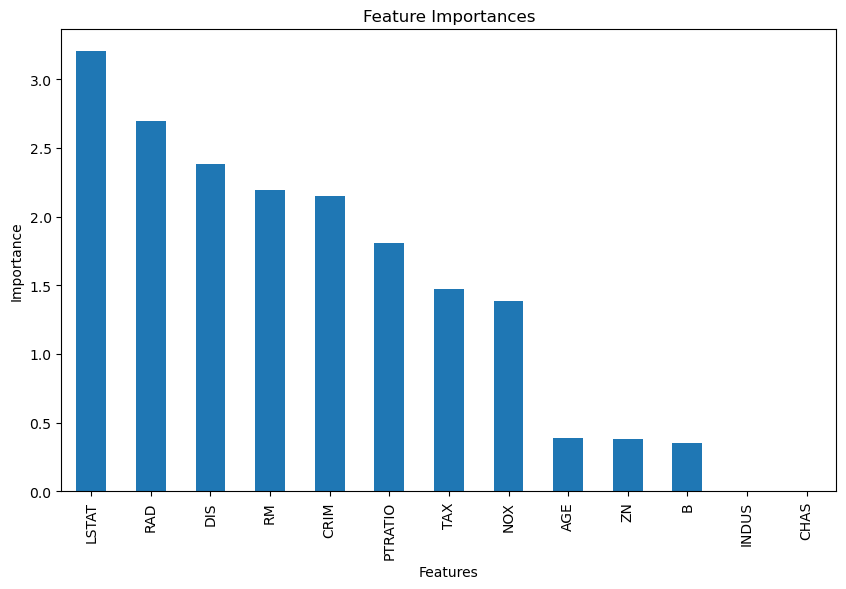

In [44]:
# Create a series for the feature importances
feature_importance = pd.Series(baseline_model.coef_, index = X_train_scaled.columns)

# Filter out non-zero coefficients, sort them by absolute value in descending order
important_features = feature_importance[feature_importance != 0].abs().sort_values(ascending = False)

# Visualize the feature importances
plt.figure(figsize = (10, 6))
plt.title("Feature Importances")
important_features.plot.bar();

plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

### Advanced Models
Implement and tune more complex models like decision tree and random forest.

#### Decision Tree

In [45]:
# Decison Tree
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_scaled, y_train)

# Evaluate model's performance
y_pred_dt = decision_tree_model.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print('Mean squared error from decision tree:', mse_dt)
print('Mean absolute error from decision tree:', mae_dt)

Mean squared error from decision tree: 15.006067708333333
Mean absolute error from decision tree: 2.6062499999999997


**Observations**


The decision tree model shows a higher MSE compared to the baseline linear regression, suggesting some overfitting to the training data. The decision tree's structure might be capturing too much noise, leading to less generalization.

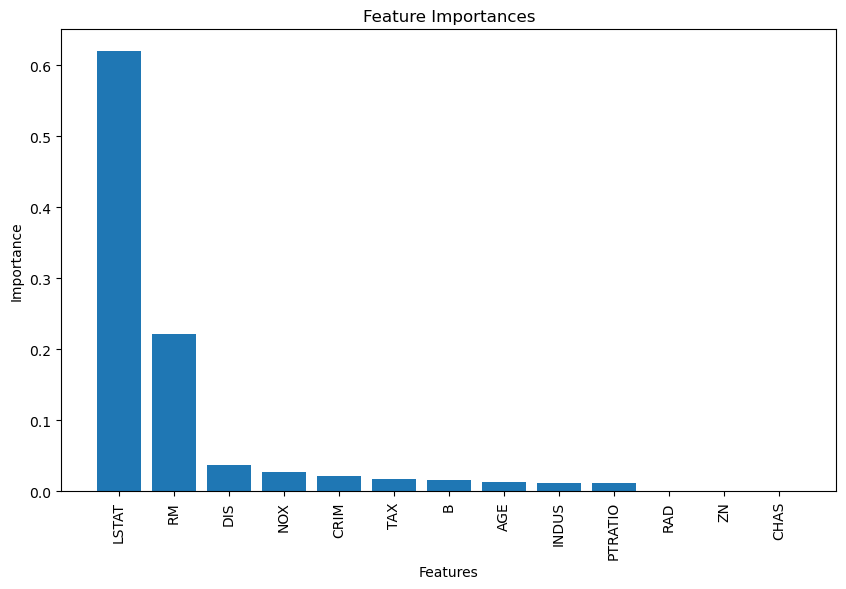

In [48]:
# Get feature importances
importances = decision_tree_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange your feature names to match the sorted importances
feature_names_sorted = X_train_scaled.columns[indices]

# Visualize the feature importances
plt.figure(figsize = (10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align = "center")

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), feature_names_sorted, rotation = 90)

plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

#### RandomForest Regressor (Before Tuning)

In [54]:
# Random Forest Regressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train_scaled, y_train)

# Evaluate model's performance
y_pred_rf = random_forest_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print('Mean squared error from random forest:', mse_rf)
print('Mean absolute error from random forest:', mae_rf)

Mean squared error from random forest: 6.27215074004289
Mean absolute error from random forest: 1.870721813725489


**Observations** 


The random forest model significantly improves upon both the baseline and the decision tree, reducing MSE substantially. This improvement underscores the benefits of ensemble learning in handling variance and bias more effectively than a single decision tree.

#### RandomForest Regressor (After Tuning)

In [67]:
# Set up a range of tree numbers to test
param_grid = {
    'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]
}

# Create a RandomForest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Setup the grid search
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, predictions)
mae_rf = mean_absolute_error(y_test, predictions)

print('Mean squared error from tuned random forest:', mse_rf)
print('Mean absolute error from tuned random forest:', mae_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'n_estimators': 175}
Mean squared error from tuned random forest: 5.920547705332142
Mean absolute error from tuned random forest: 1.8206715686274544


**Observations**

Tuning the random forest further enhances its performance, reducing both MSE and MAE. This highlights the impact of hyperparameter optimization in extracting the best performance from complex models.

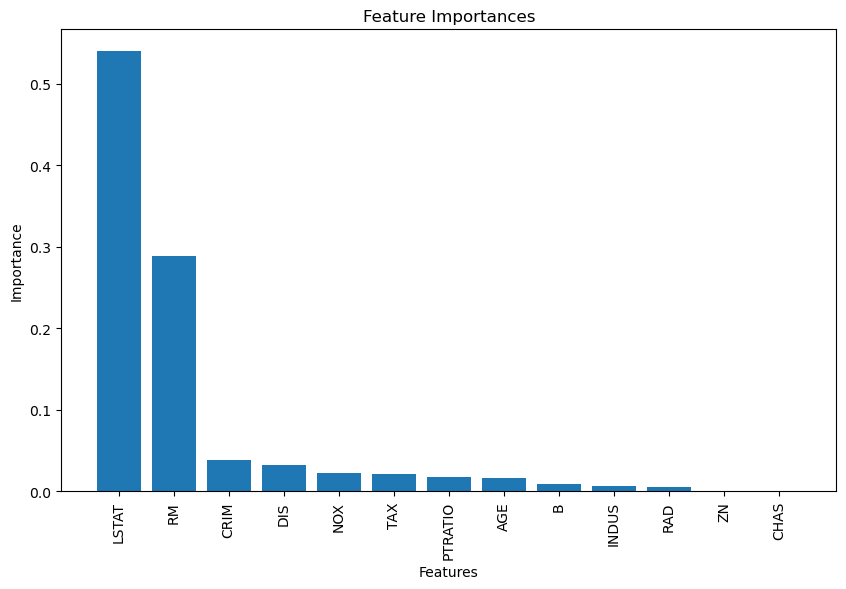

In [125]:
# Get feature importances
importances = best_rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange your feature names to match the sorted importances
feature_names_sorted = X_train_scaled.columns[indices]

# Visualize the feature importances
plt.figure(figsize = (10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align = "center")

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), feature_names_sorted, rotation = 90)

plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

### Neural Network
Develop a Sequential neural network model.

In [118]:
# Define model
nn_model = Sequential([
    Input(shape = (13, )),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'linear')
])

In [119]:
# Compile model
nn_model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ['mae'])
nn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 512)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,761 (710.00 KB)

 Trainable params: 181,761 (710.00 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
history = nn_model.fit(
            X_train_scaled,
            y_train,
            epochs = 100,
            verbose = 0,
            validation_split = 0.2)

In [121]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
95,3.223396,1.336001,8.784288,2.184871,95
96,3.144180,1.332805,8.740337,2.165314,96
97,2.841603,1.197647,8.758729,2.182959,97
98,2.946073,1.237535,9.720798,2.297103,98
99,2.667372,1.175762,8.512950,2.148733,99


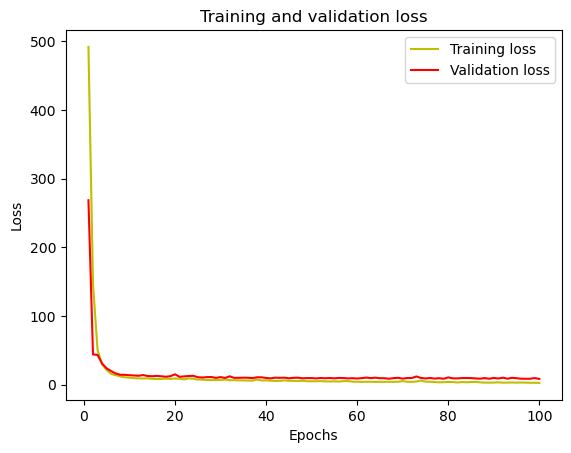

In [122]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

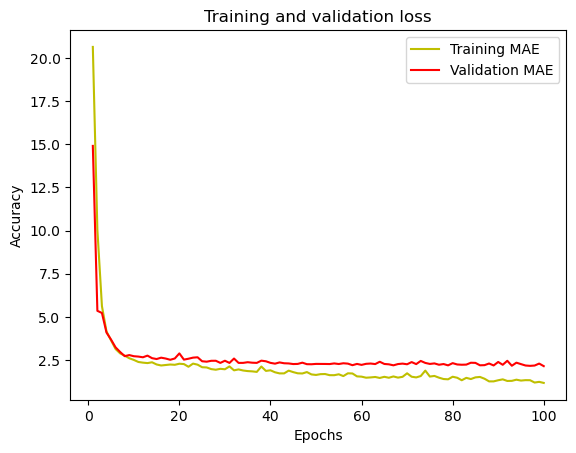

In [123]:
acc = history.history['mae']
val_acc = history.history['val_mae']

plt.plot(epochs, acc, 'y', label = 'Training MAE')
plt.plot(epochs, val_acc, 'r', label = 'Validation MAE')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [124]:
mse_neural, mae_neural = nn_model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net:', mse_neural)
print('Mean absolute error from neural net:', mae_neural)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4148 - mae: 1.9140 
Mean squared error from neural net: 7.383056640625
Mean absolute error from neural net: 2.0102412700653076


**Observations**

The neural network model performance better than both the linear regression baseline and the decision tree but does not surpass the optimized random forest. 
This indicates that while neural networks have significant potential due to their ability to model complex nonlinear relationships, their performance in this context may be limited by the relatively small size of the Boston Housing dataset. Neural networks often require large datasets to effectively generalize and avoid overfitting.


## Evaluation and Analysis

The **tuned Random Forest Regressor** stands out as the top-performing model, achieving the lowest mean squared error (MSE) and mean absolute error (MAE). This superior performance highlights the robustness of ensemble methods like random forests in managing smaller datasets and complex feature interactions effectively, making them particularly suitable for this type of regression problem.
 
#### Feature Influence
Key features such as **LSTAT** (percentage of lower status population), **RM** (average number of rooms per dwelling), and **PTRATIO** (pupil-teacher ratio by town) have been consistently identified as significant predictors across various models, underscoring their strong impact on the median value of homes (MEDV). This consistent importance across different models reinforces their reliability as critical predictors in housing price models.

#### Feature Variability
Features like **DIS** (weighted distances to five Boston employment centers) and **TAX** (full-value property-tax rate per $10,000) exhibit variability in their perceived importance across different modeling techniques. This variability may stem from each model's unique handling of data complexity and interactions among features. This variability suggests that no single model may capture all aspects of the dataset comprehensively, advocating for a multimodal approach in predictive analytics.

These observations show the importance of utilizing multiple modeling approaches to gain a comprehensive understanding of feature importance and model performance. Reliance on a single model could introduce bias or overlook crucial predictors, leading to less effective predictive performance. By comparing a range of models, including both traditional machine learning and neural networks, this project provides a broad perspective that enhances our understanding of the dynamics influencing housing prices in Boston.